In [81]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [82]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/input/Analyse/student_exam_scores.csv')
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


In [83]:
df.shape

(200, 6)

In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
#Removing Duplicates
df=df.drop_duplicates()

In [86]:
#Checking for null values
df.isnull().sum()

,0
student_id,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [88]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [89]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['student_id']=le.fit_transform(df['student_id'])

In [90]:
#Let's check what's happened now
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,0,8.0,8.8,72.1,45,30.2
1,1,1.3,8.6,60.7,55,25.0
2,2,4.0,8.2,73.7,86,35.8
3,3,3.5,4.8,95.1,66,34.0
4,4,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,195,10.5,5.4,94.0,87,42.7
196,196,7.1,6.1,85.1,92,40.4
197,197,1.6,6.9,63.8,76,28.2
198,198,12.0,7.3,50.5,58,42.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    int64  
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 9.5 KB


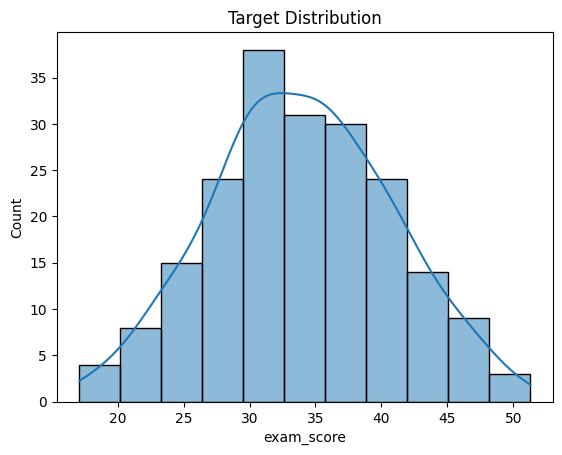

In [92]:
#Let's check the distributaion of Target variable.
sns.histplot(x='exam_score', data=df, kde=True)
plt.title('Target Distribution');


In [93]:
df['exam_score'].value_counts()

,count
exam_score,
36.1,5
31.0,3
35.8,3
30.7,3
28.8,3
...,...
46.7,1
33.8,1
40.4,1


In [94]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

In [95]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['exam_score'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))


<Axes: xlabel='student_id'>

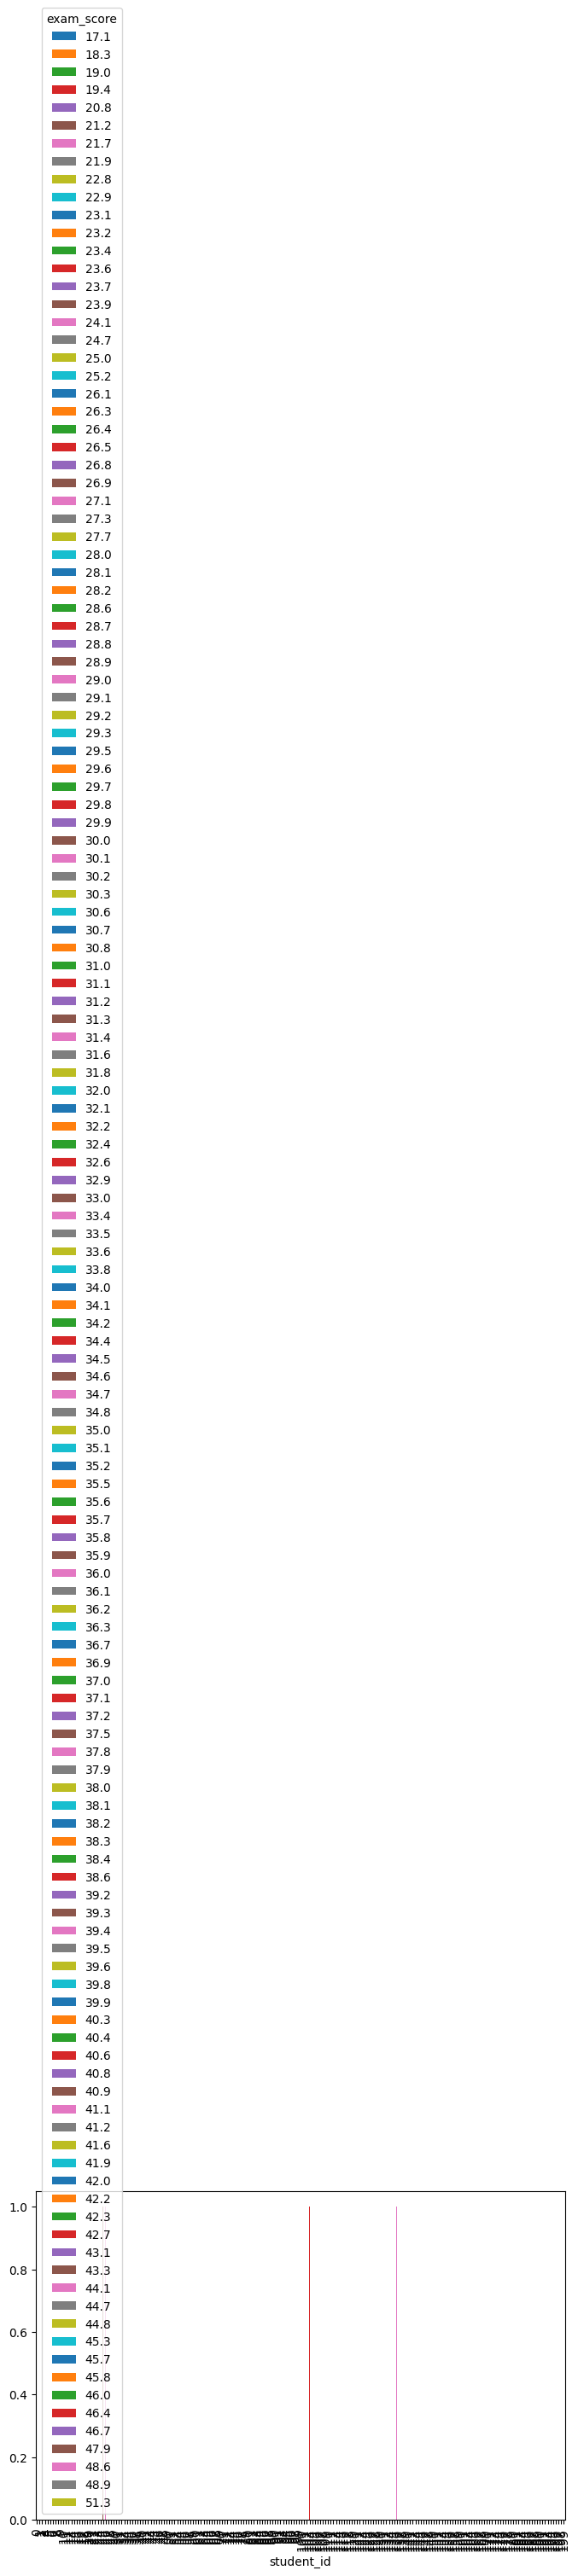

In [96]:


plot('student_id')



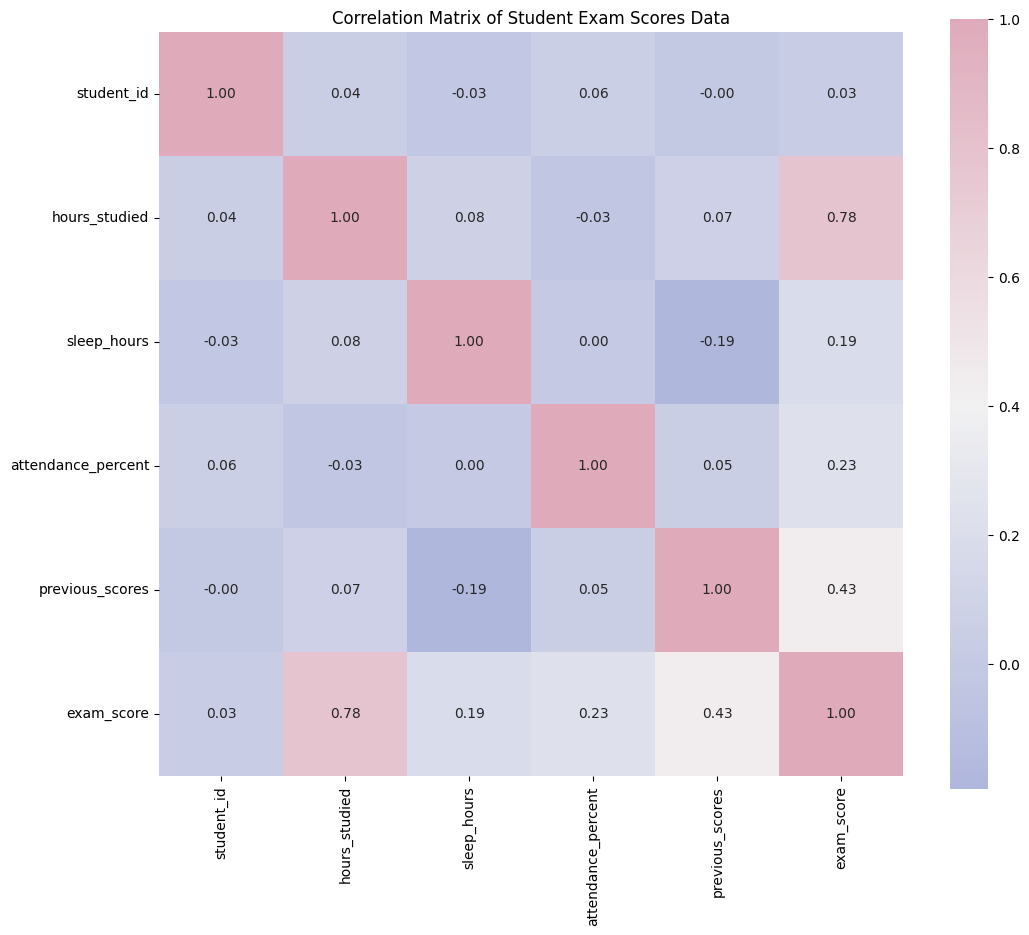

In [97]:
# Importing necessary libraries for plotting (if not already imported)
import seaborn as sns
import matplotlib.pyplot as plt

# Finding Correlation for the current dataframe, considering only numeric columns
cn = df.corr(numeric_only=True)

# Plotting the correlation heatmap
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(12, 10)) # Adjusted figsize for better readability
sns.heatmap(cn, cmap=cmap, annot=True, square=True, fmt=".2f") # fmt for better annotation display
plt.title('Correlation Matrix of Student Exam Scores Data')
plt.show()

In [98]:
#Finding Correlation
cn=df.corr(numeric_only=True)
cn

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
student_id,1.000000,0.039824,-0.027656,0.055571,-0.004933,0.028528
hours_studied,0.039824,1.000000,0.077864,-0.031311,0.069078,0.776751
sleep_hours,-0.027656,0.077864,1.000000,0.000572,-0.194251,0.188222
attendance_percent,0.055571,-0.031311,0.000572,1.000000,0.051958,0.225713
previous_scores,-0.004933,0.069078,-0.194251,0.051958,1.000000,0.431105
exam_score,0.028528,0.776751,0.188222,0.225713,0.431105,1.000000


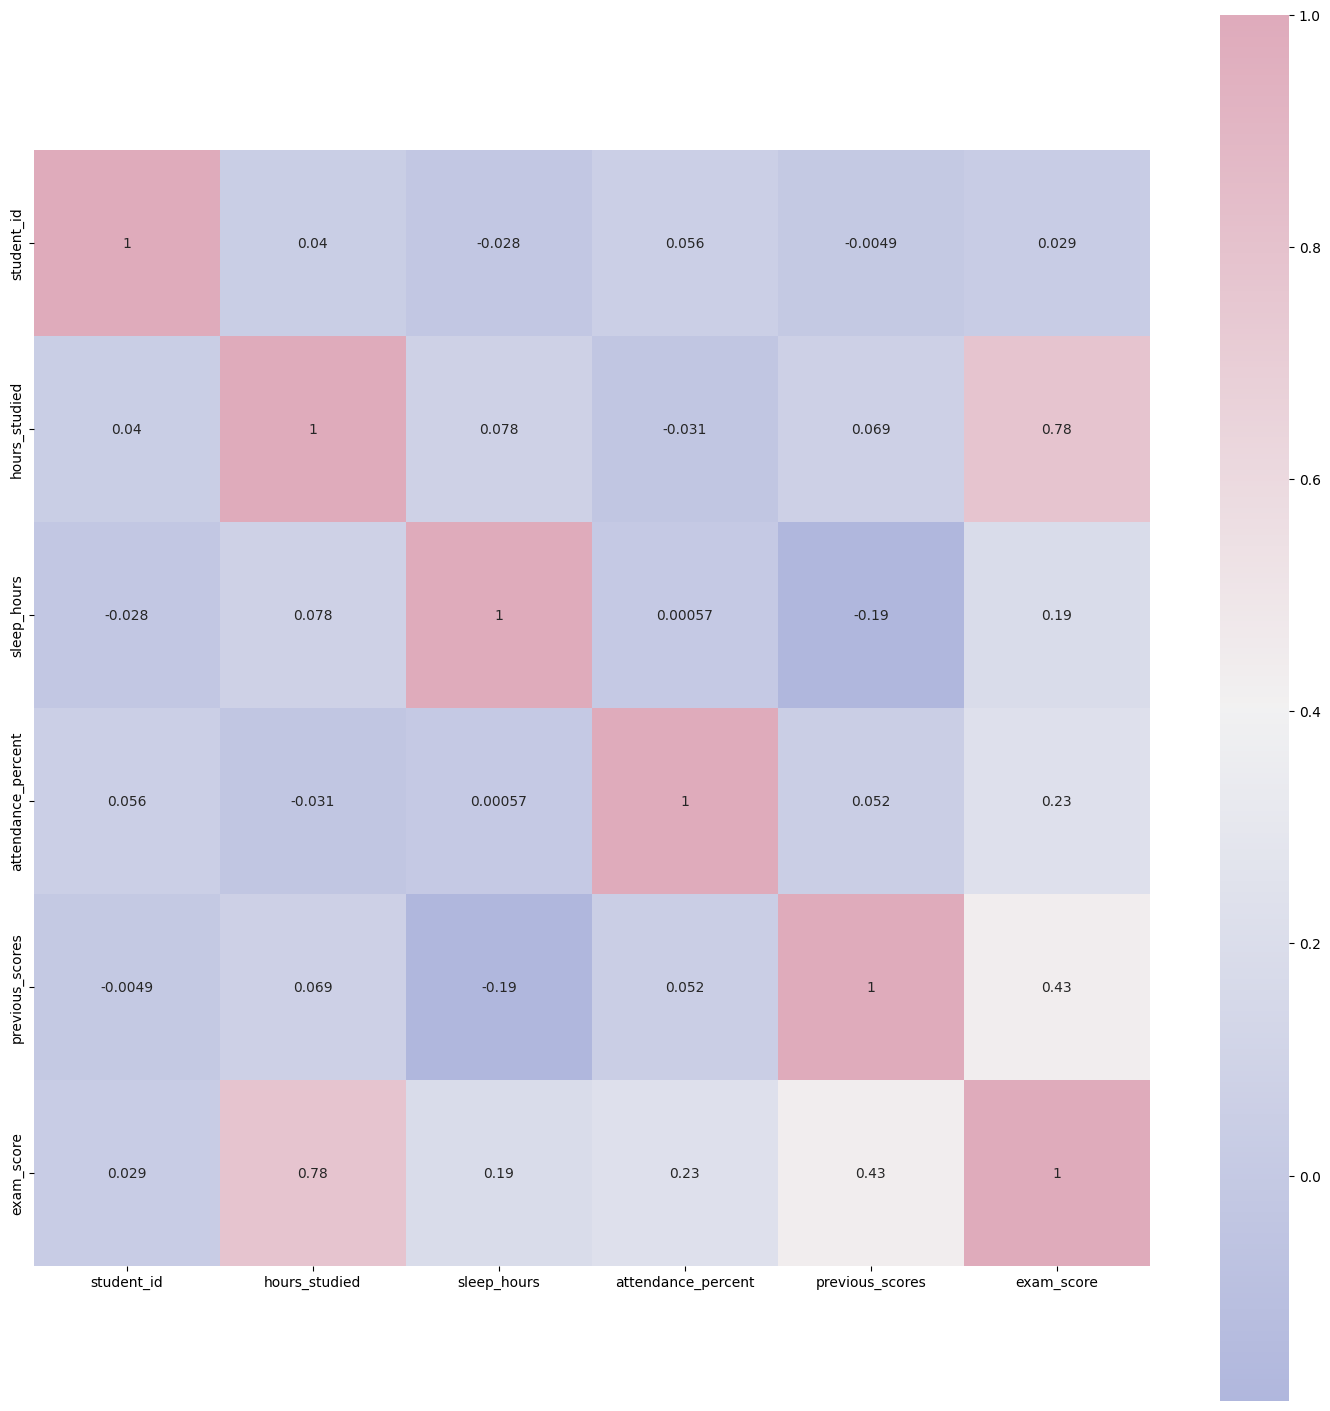

In [99]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()





<Axes: >

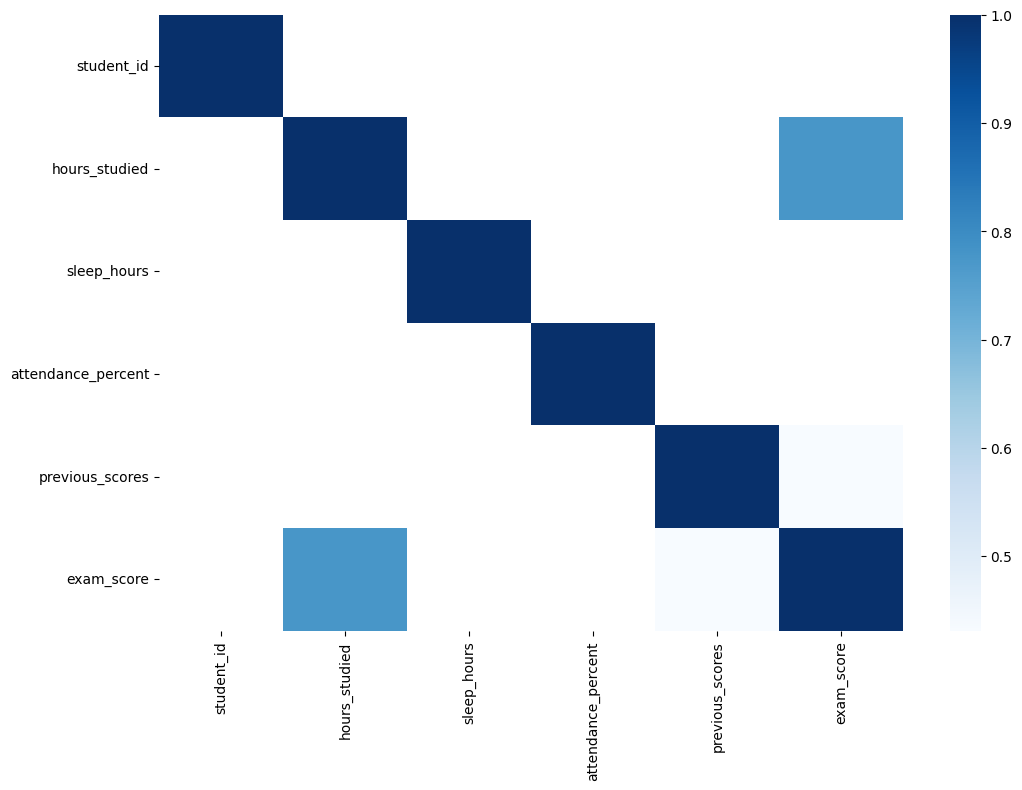

In [100]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

In [101]:
df_new['student_id']=df_new['student_id']*df_new['exam_score']
df_new



,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,0.00,8.0,8.8,72.1,45,30.2
1,625.00,1.3,8.6,60.7,55,25.0
2,2563.28,4.0,8.2,73.7,86,35.8
3,3468.00,3.5,4.8,95.1,66,34.0
4,6496.36,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,355541.55,10.5,5.4,94.0,87,42.7
196,319903.36,7.1,6.1,85.1,92,40.4
197,156662.28,1.6,6.9,63.8,76,28.2
198,349272.00,12.0,7.3,50.5,58,42.0


In [102]:
# Create df_new as a copy of df to ensure it is defined
df_new = df.copy()

df_new

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,0,8.0,8.8,72.1,45,30.2
1,1,1.3,8.6,60.7,55,25.0
2,2,4.0,8.2,73.7,86,35.8
3,3,3.5,4.8,95.1,66,34.0
4,4,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,195,10.5,5.4,94.0,87,42.7
196,196,7.1,6.1,85.1,92,40.4
197,197,1.6,6.9,63.8,76,28.2
198,198,12.0,7.3,50.5,58,42.0


In [103]:
#Splitting independent and dependent variables
X = df_new.drop('exam_score', axis = 1)
y = df_new['exam_score']

In [104]:
len(X)

200

In [105]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [106]:
#Fitting training data to the model
from sklearn.linear_model import LinearRegression # Changed from LogisticRegression to LinearRegression
lr_model=LinearRegression() # Changed from LogisticRegression() to LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [107]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([37.56322094, 45.72218792, 37.25625198, 41.03266482, 34.84044939,
       44.5848987 , 35.76495031, 41.51351013, 27.32489633, 28.80957728,
       35.36252039, 37.23617667, 37.84018881, 26.45317649, 32.18606215,
       23.26006634, 44.22409059, 28.87407752, 35.10072451, 33.23543381,
       22.53689322, 29.50664025, 27.47808959, 28.83317721, 43.98174136,
       39.63438091, 33.41063145, 26.13426973, 45.08057541, 26.40642385,
       24.34977743, 36.92605542, 42.69609779, 32.30628658, 28.52882194,
       27.58585739, 39.70813555, 40.28480268, 45.05308986, 27.07785089,
       28.01412902, 26.28548146, 28.33580712, 25.06498405, 28.33918042,
       39.6078543 , 35.8558313 , 28.50785939, 36.01242933, 39.36883986])

In [108]:
#Model accuracy using regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy

mae = mean_absolute_error(y_test, y_lr_pred)
mse = mean_squared_error(y_test, y_lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_lr_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 2.18
Mean Squared Error (MSE): 7.19
Root Mean Squared Error (RMSE): 2.68
R-squared (R2): 0.86


In [109]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor(criterion='squared_error', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [110]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([43.1, 41.9, 40.3, 36.9, 35. , 44.8, 31.3, 37.9, 26.8, 32.2, 34. ,
       34.2, 35.7, 20.8, 31. , 26.9, 37.8, 19. , 35. , 34.2, 21.9, 28.1,
       26.5, 25.2, 45.7, 40.9, 31. , 28.8, 51.3, 30.3, 26.5, 34. , 39.6,
       32.4, 30. , 29.1, 36.2, 36.1, 44.8, 31.6, 29.8, 32.2, 30.2, 23.6,
       30. , 41.2, 40.3, 32. , 31.3, 44.8])

In [111]:
#Model accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_dt_pred)
mse = mean_squared_error(y_test, y_dt_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_dt_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 4.14
Mean Squared Error: 25.59
Root Mean Squared Error: 5.06
R-squared: 0.52


In [112]:
#Fitting K-NN Regressor to the training set
from sklearn.neighbors import KNeighborsRegressor # Changed to KNeighborsRegressor
knn_model= KNeighborsRegressor(n_neighbors=5) # No 'metric' or 'p' needed for KNeighborsRegressor by default with Euclidean distance
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [113]:
# Predicting result using testing data
y_knn_pred = knn_model.predict(X_test)

# Model accuracy using regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_knn_pred)
mse = mean_squared_error(y_test, y_knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_knn_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 4.56
Mean Squared Error (MSE): 33.18
Root Mean Squared Error (RMSE): 5.76
R-squared (R2): 0.38


In [114]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([35.52, 35.22, 35.54, 36.18, 35.66, 38.78, 30.2 , 38.34, 31.8 ,
       27.54, 32.32, 40.68, 33.5 , 29.54, 28.44, 30.46, 34.58, 33.7 ,
       31.76, 35.82, 32.66, 30.7 , 31.12, 32.1 , 37.72, 39.22, 30.44,
       32.66, 37.98, 29.58, 31.12, 32.56, 33.08, 35.56, 29.62, 32.66,
       35.98, 34.02, 42.34, 33.9 , 30.7 , 27.6 , 36.1 , 34.5 , 28.98,
       41.06, 36.42, 31.  , 33.44, 33.88])